In [1]:
from neuron import h
import matplotlib.pyplot as plt
import numpy as np

In [2]:
h.load_file('stdrun.hoc')

1.0

In [3]:
soma = h.Section(name='soma')
soma.L = 20
soma.diam = 20
soma.insert('hh')

soma

In [4]:
iclamp = h.IClamp(soma(0.5))

In [5]:
iclamp.delay = 5
iclamp.dur = 40
iclamp.amp = 1

In [21]:
duration = 100  # Total duration (ms)
dt = 0.1
t_vec = h.Vector(np.arange(0, duration, dt))

i_amp = 0.5
i_period = 2
i_vec = h.Vector(i_amp * np.sin(np.pi * t_vec / i_period))
i_vec.play(iclamp._ref_amp, t_vec, 1)

Vector[25]

In [7]:
t = h.Vector().record(h._ref_t)
v = h.Vector().record(soma(0.5)._ref_v)

In [8]:
gna = h.Vector().record(soma(0.5)._ref_gna_hh)  # Sodium conductance
gk = h.Vector().record(soma(0.5)._ref_gk_hh)    # Potassium conductance
ina = h.Vector().record(soma(0.5)._ref_ina)     # Sodium current
ik = h.Vector().record(soma(0.5)._ref_ik)       # Potassium current

In [9]:
m = h.Vector().record(soma(0.5)._ref_m_hh)  # Sodium activation
h_gate = h.Vector().record(soma(0.5)._ref_h_hh)  # Sodium inactivation
n = h.Vector().record(soma(0.5)._ref_n_hh)  # Potassium activation

In [10]:
iclamp_current = h.Vector().record(iclamp._ref_i)  # Current injected by IClamp

In [15]:
h.tstop = 100
h.v_init = -65
h.dt = 0.025

In [22]:
h.finitialize(h.v_init)
h.continuerun(h.tstop)

0.0

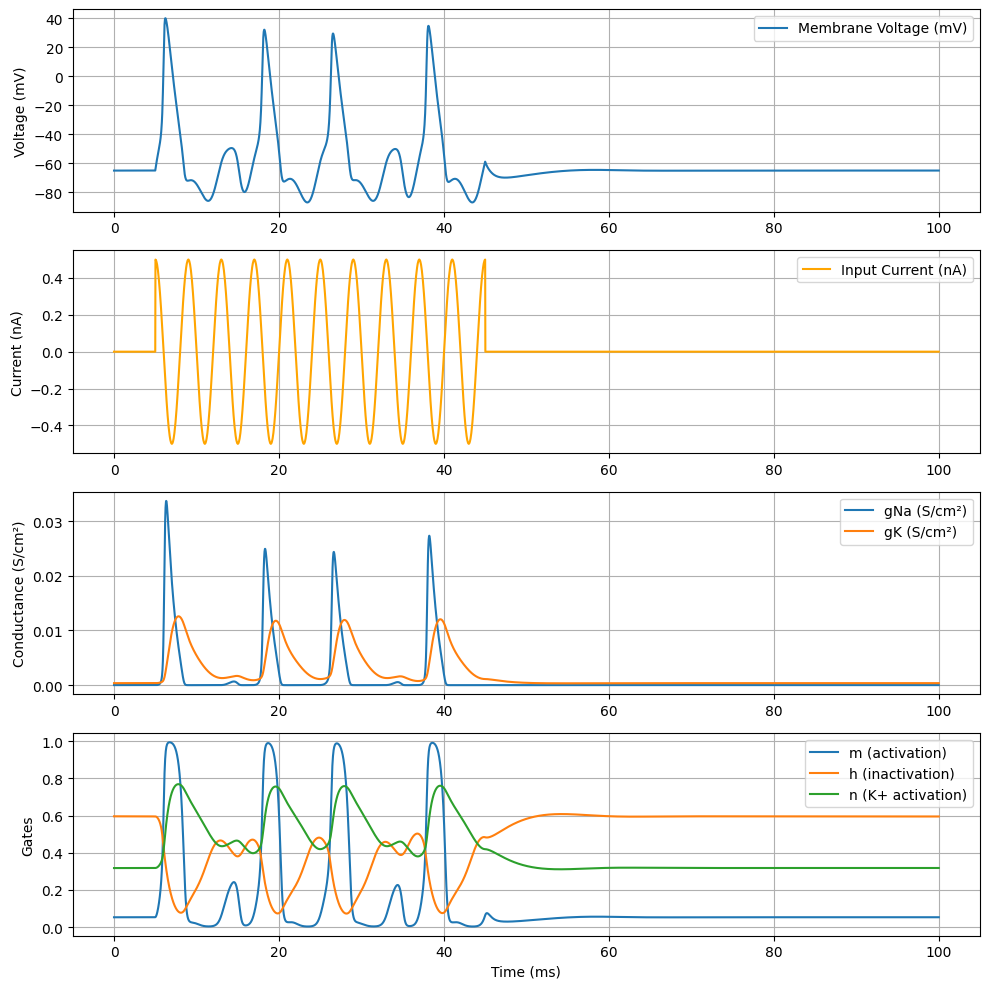

In [23]:
plt.figure(figsize=(10, 10))

# Subplot 1: Membrane Voltage
plt.subplot(4, 1, 1)
plt.plot(t, v, label='Membrane Voltage (mV)')
plt.ylabel('Voltage (mV)')
plt.grid(True)
plt.legend()

# Subplot 2: Input Current
plt.subplot(4, 1, 2)
plt.plot(t, iclamp_current, label='Input Current (nA)', color='orange')
plt.ylabel('Current (nA)')
plt.grid(True)
plt.legend()

# Subplot 3: Conductances
plt.subplot(4, 1, 3)
plt.plot(t, gna, label='gNa (S/cm²)')
plt.plot(t, gk, label='gK (S/cm²)')
plt.ylabel('Conductance (S/cm²)')
plt.grid(True)
plt.legend()

# Subplot 4: Gating Variables
plt.subplot(4, 1, 4)
plt.plot(t, m, label='m (activation)')
plt.plot(t, h_gate, label='h (inactivation)')
plt.plot(t, n, label='n (K+ activation)')
plt.xlabel('Time (ms)')
plt.ylabel('Gates')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()